# Aнализ базы данных приложения для чтения книг по подписке.

Цель исследования: Анализ базы данных крупного сервиса, которая поможет сформулировать ценностное предложение для нового продукта.В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.

# Описание данных

Таблица **books** - cодержит данные о книгах:

- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя

Таблица **authors** -cодержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

Таблица **publishers** - cодержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

Таблица **ratings** - cодержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

Таблица reviews - cодержит данные о пользовательских обзорах:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.


# Схема данных

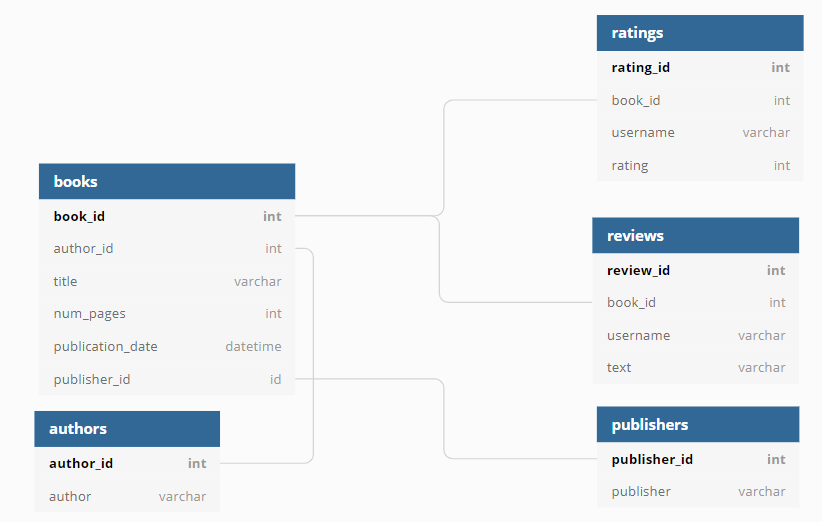

# Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;

- Для каждой книги посчитайте количество обзоров и среднюю оценку;

- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.


In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# ознакомимся с данными
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {}; 
    '''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine) 
    display(request.head())
    print(request.info())
    print(f'Таблица - "{table}"') 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
Таблица - "books"


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
Таблица - "authors"


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None
Таблица - "publishers"


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None
Таблица - "ratings"


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
Таблица - "reviews"


Посчитать, сколько книг вышло после 1 января 2000 года

In [3]:
query = '''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''

pd.io.sql.read_sql(query, con = engine)

,count
0,819


После 1 января 2000 года вышло 819 книг.

Для каждой книги посчитайте количество обзоров и среднюю оценку

In [4]:
query = '''

SELECT b.book_id, 
       b.title, 
       COUNT(DISTINCT rev.review_id) AS count_reviews, 
       ROUND(AVG(r.rating),2) AS avg_rating
FROM books AS b

LEFT JOIN reviews AS rev
ON b.book_id = rev.book_id

LEFT JOIN  ratings AS r
ON b.book_id = r.book_id

GROUP BY b.book_id, b.title
ORDER BY count_reviews DESC

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,title,count_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,963,Water for Elephants,6,3.98
2,734,The Glass Castle,6,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,808,The Natural Way to Draw,0,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,221,Essential Tales and Poems,0,4.00


In [5]:
query = '''

SELECT COUNT(book_id)
FROM books

'''

pd.io.sql.read_sql(query, con = engine)

,count
0,1000


Из 1000 книг средняя оценка вариирует от 1.5 до 5. Средняя оценка не зависит от количества обзоров. Больше всего обзоров у книги Twilight (Сумерки) - 7, но рейтинг у данной книги - 3.66. Есть книги, которые не получили обзора пользователей. Разрекламированная книга не значит, что она интересна пользователю.

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [6]:
query = '''

SELECT pub.publisher,
       COUNT(b.title) AS count_pub
       
      
FROM publishers AS pub

RIGHT JOIN books AS b
ON b.publisher_id = pub.publisher_id
WHERE num_pages>50
GROUP BY publisher

ORDER BY count_pub DESC 
LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,publisher,count_pub
0,Penguin Books,42


Издательство Penguin Books выпустило больше всего книг толще 50 страниц - 42 шт.

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [10]:
query = '''
SELECT  a.author,
        AVG(avg_book_avg_ratings.avg_b_r) as   avg_a_r 
FROM authors As a
JOIN books As b ON b.author_id = a.author_id
JOIN (
    SELECT
        book_id,
        AVG(rating) as avg_b_r
    from ratings
    group by book_id
    having count(rating_id) >= 50
) as avg_book_avg_ratings on
     avg_book_avg_ratings.book_id = b.book_id
GROUP BY a.author
ORDER BY avg_a_r DESC
LIMIT 1
'''

pd.io.sql.read_sql(query, con = engine)

,author,avg_a_r
0,J.K. Rowling/Mary GrandPré,4.283844


Самой высокой средней оценкой книг(только книги с 50 и более оценками) является автор -J.K. Rowling/Mary GrandPré.Средняя оценка книг составляет 4.283844.

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [8]:
query = '''

WITH

u_rating As (SELECT username,
                    COUNT(rating) As count_rating
             FROM ratings
             GROUP  BY 1
             HAVING COUNT(rating)> 48
             ORDER BY count_rating DESC
),
u_review As (SELECT username, 
                    COUNT(text) As count_text
             FROM reviews
             GROUP  BY 1
             ORDER BY count_text DESC   
)
SELECT AVG(urg.count_text) As avg_count
FROM u_rating As urw JOIN u_review As urg ON urg.username = urw.username

'''

pd.io.sql.read_sql(query, con = engine)

,avg_count
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет 24.

ВЫВОДЫ:
- После 1 января 2000 года вышло 819 книг. 
- Из 1000 книг средняя оценка варьирует от 1.5 до 5. Средняя оценка не зависит от количества обзоров. Больше всего обзоров у книги Twilight (Сумерки) - 7, но рейтинг у данной книги - 3.66. Есть книги, которые не получили обзора пользователей. Разрекламированная книга не значит, что она интересна пользователю.
- Издательство Penguin Books выпустило больше всего книг толще 50 страниц - 42 шт.
- Самой высокой средней оценкой книг(только книги с 50 и более оценками) является автор -J.K. Rowling/Mary GrandPré.Средняя оценка книг составляет 4.283844.
- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет 24.

Рекомендации:

    - Увеличить ассортимент книг;
    - Увеличить количество книг;
    - Устраивать рекламные кампании;
    - Придумать систему поощрения пользователей.    